1   Neural networks

Exercise 1a: Fashion MNIST

In [1]:
###    Import all the imports that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
###    Read the train data with pandas
data_train_mnist = pd.read_csv("fashion-mnist_train.csv")
###    Display the first five rows
data_train_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
###    Read the test data with pandas
data_test_mnist = pd.read_csv("fashion-mnist_test.csv")
###    Display the first five rows
data_test_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The mapping between the numeric value in the label column and the category is not included in the dataset, but defined as follows:


0 - T-shirt/top


1 - Trouser


2 - Pullover


3 - Dress


4 - Coat


5 - Sandal


6 - Shirt


7 - Sneaker


8 - Bag


9 - Ankle boot


For example, in row 0 (the first row) of the training mnist set, the numeric label value is 2, which represents a pullover.

In [4]:
###    normalise the training mnist data in the part of pixel integers
data_train_mnist_normal = data_train_mnist.iloc[:,1:] / 255
###    Save the label(in 0-9 format) as 'target'
target_training = data_train_mnist[['label']].iloc[:, :]
###    visualise the first five rows of the pixels of training mnist set
data_train_mnist_normal.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [5]:
###    do the same thing for test mnist set
data_test_mnist_normal = data_test_mnist.iloc[:,1:] / 255
target_test = data_test_mnist[['label']].iloc[:, :]
data_test_mnist_normal.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
# Manually set up the meaning of the labels from 0 to 9
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Question 1: Plot 16 random samples from the training mnist set

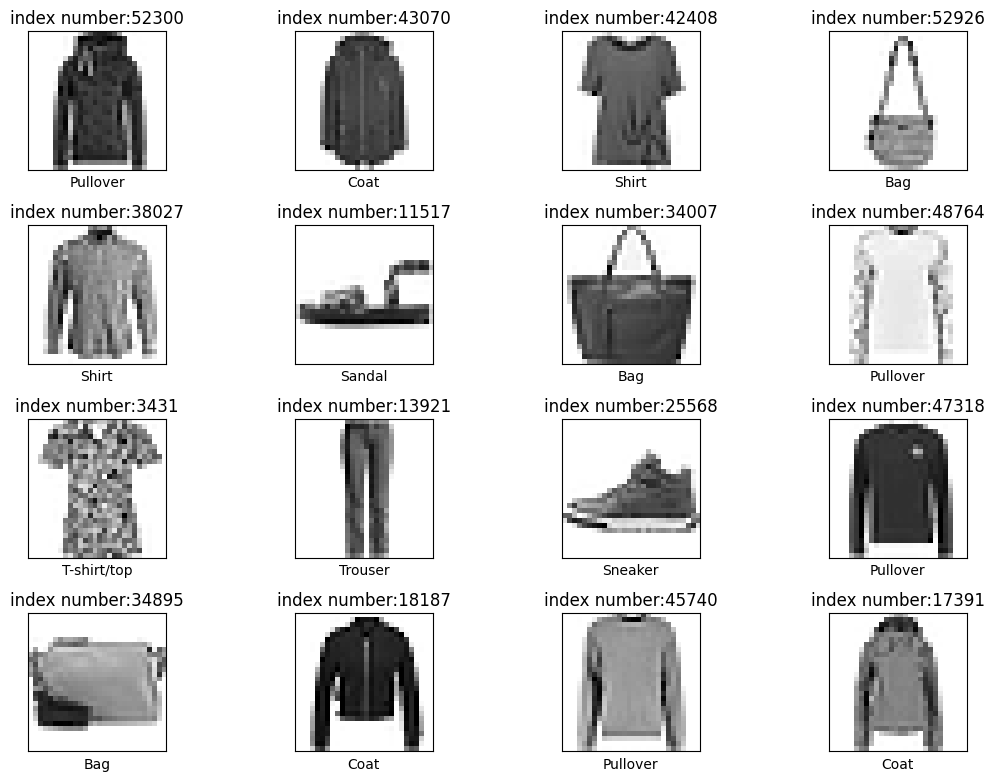

In [7]:
index_random = np.array(np.random.randint(0,high=60000,size=16,dtype=int))
plt.figure()
for i in range(len(index_random)):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(left=0.001, right=1.6, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(data_train_mnist_normal.iloc[index_random[i], :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target_training.label.iloc[index_random[i]]])
    plt.title(f"index number:{index_random[i]}")
plt.show()

Question 2: Train a multilayer perceptron

In [8]:
X_train=data_train_mnist_normal
Y_train=np.array(target_training).ravel()
X_test=data_test_mnist_normal
Y_test=np.array(target_test).ravel()

In [9]:
###    Determine the best learning rate for this MLP
learning_rate = [0.1,0.05,0.02,0.01,0.001]
print("Test accuracy for each learning rate provided:")
ACCURACY=[]
for i in range(len(learning_rate)):
    mlp=MLPClassifier(hidden_layer_sizes=[10,10,10],activation='relu',solver='lbfgs',alpha=1e-4,batch_size="auto",learning_rate="constant",learning_rate_init=learning_rate[i],power_t=0.5,max_iter=200)
    clf=mlp.fit(X_train,Y_train)
    accuracy=clf.score(X_test,Y_test)
    print("")
    print(f"The {i+1}th accuracy rate for {learning_rate[i]} is: {accuracy}")
    print("")
    ACCURACY.append(accuracy)
for i in range(len(ACCURACY)):
    if ACCURACY[i] == max(ACCURACY):
        index = i
ln_chosen = learning_rate[index]
print("")
print(f"The chosen learning rate is: {ln_chosen}")
print("")

Test accuracy for each learning rate provided:


C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 1th accuracy rate for 0.1 is: 0.8236



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 2th accuracy rate for 0.05 is: 0.8206



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 3th accuracy rate for 0.02 is: 0.8187



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 4th accuracy rate for 0.01 is: 0.7496


The 5th accuracy rate for 0.001 is: 0.8407


The chosen learning rate is: 0.001



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [10]:
model=[[5,5,5],[10,10,10],[20,20,20],[30,30,30]]
print("Test accuracy for each hidden layer sizes provided:")
ACCURACY=[]
for i in range(len(model)):
    mlp=MLPClassifier(hidden_layer_sizes=model[i],activation='relu',solver='lbfgs',learning_rate='constant',learning_rate_init=ln_chosen)
    clf=mlp.fit(X_train,Y_train)
    accuracy=clf.score(X_test,Y_test)   
    print("")
    print(f"The {i+1}th accuracy rate for {model[i]} is: {accuracy}")
    print("")
    ACCURACY.append(accuracy)
for i in range(len(ACCURACY)):
    if ACCURACY[i] == max(ACCURACY):
        index = i
model_chosen = model[index]
print("")
print(f"The chosen hidden layer size is: {model_chosen}")
print("")


Test accuracy for each hidden layer sizes provided:


C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 1th accuracy rate for [5, 5, 5] is: 0.6432



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 2th accuracy rate for [10, 10, 10] is: 0.8261



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 3th accuracy rate for [20, 20, 20] is: 0.852


The 4th accuracy rate for [30, 30, 30] is: 0.858


The chosen hidden layer size is: [30, 30, 30]



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [11]:
activation_function = ['relu','identity','logistic','tanh']
print("Test accuracy for each activation function provided:")
ACCURACY=[]
for i in range(len(activation_function)):
    mlp=MLPClassifier(hidden_layer_sizes=model_chosen,activation=activation_function[i],solver='lbfgs',learning_rate='constant',learning_rate_init=ln_chosen)
    clf=mlp.fit(X_train,Y_train)
    accuracy=clf.score(X_test,Y_test)
    print("")
    print(f"The {i+1}th accuracy rate for {activation_function[i]} is: {accuracy}")
    print("")
    ACCURACY.append(accuracy)
for i in range(len(ACCURACY)):
    if ACCURACY[i] == max(ACCURACY):
        index = i   
ac_chosen = activation_function[index]
print("")
print(f"The chosen activation function is: {ac_chosen}")
print("")

Test accuracy for each activation function provided:


C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 1th accuracy rate for relu is: 0.8635



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 2th accuracy rate for identity is: 0.8574



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 3th accuracy rate for logistic is: 0.8133


The 4th accuracy rate for tanh is: 0.8801


The chosen activation function is: tanh



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
regularization = [0.1,0.01,0.001,0.0001,0.00001]
print("Test accuracy for each regularization strength provided:")
ACCURACY=[]
for i in range(len(regularization)):
    mlp = MLPClassifier(hidden_layer_sizes=model_chosen,activation=ac_chosen,solver='lbfgs',learning_rate='constant',learning_rate_init=ln_chosen,alpha=regularization[i])
    clf=mlp.fit(X_train,Y_train)
    accuracy=clf.score(X_test,Y_test)
    print("")
    print(f"The {i+1}th accuracy rate for {regularization[i]} is: {accuracy}")
    print("")
    ACCURACY.append(accuracy)
for i in range(len(ACCURACY)):
    if ACCURACY[i] == max(ACCURACY):
        index = i   
alpha_chosen = regularization[index]
print("")
print(f"The chosen alpha float is: {alpha_chosen}")
print("")

Test accuracy for each regularization strength provided:


C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 1th accuracy rate for 0.1 is: 0.8773



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 2th accuracy rate for 0.01 is: 0.8765



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 3th accuracy rate for 0.001 is: 0.8814



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The 4th accuracy rate for 0.0001 is: 0.8771


The 5th accuracy rate for 1e-05 is: 0.8799


The chosen alpha float is: 0.001



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
early_stop = [True,False]
print("Test accuracy for early stop or not provided:")
ACCURACY=[]
for i in range(len(early_stop)):
    mlp=MLPClassifier(learning_rate='constant',learning_rate_init=ln_chosen,hidden_layer_sizes=model_chosen,activation=ac_chosen,alpha=alpha_chosen,early_stopping=early_stop[i])
    clf=mlp.fit(X_train,Y_train)
    accuracy=clf.score(X_test,Y_test)   
    print("")
    print(f"The {i+1}th accuracy rate for {early_stop[i]} of early stop is: {accuracy}")
    print("")
    ACCURACY.append(accuracy)
for i in range(len(ACCURACY)):
    if ACCURACY[i] == max(ACCURACY):
        index = i  
early_chosen = early_stop[index]
print("")
print(f"The chosen early stop or not is: {early_chosen}")
print("")

Test accuracy for early stop or not provided:

The 1th accuracy rate for True of early stop is: 0.8852


The 2th accuracy rate for False of early stop is: 0.8725


The chosen early stop or not is: True



C:\Users\yishu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
max_ite = [200,500,1000,2000]
print("Test accuracy for each maximum iteration provided:")
ACCURACY=[]
for i in range(len(max_ite)):
    mlp = MLPClassifier(learning_rate='constant',learning_rate_init=ln_chosen,hidden_layer_sizes=model_chosen,activation=ac_chosen,alpha=alpha_chosen,early_stopping=early_chosen,max_iter=max_ite[i])
    clf=mlp.fit(X_train,Y_train)
    accuracy=clf.score(X_test,Y_test)
    print("")
    print(f"The {i+1}th accuracy rate for {max_ite[i]} iteration is: {accuracy}")
    print("")
    ACCURACY.append(accuracy)
for i in range(len(ACCURACY)):
    if ACCURACY[i] == max(ACCURACY):
        index = i
iter_chosen = max_ite[index]
print("")
print(f"The chosen maximum iteration is: {iter_chosen}")
print("")

Test accuracy for each maximum iteration provided:

The 1th accuracy rate for 200 iteration is: 0.8813


The 2th accuracy rate for 500 iteration is: 0.8837


The 3th accuracy rate for 1000 iteration is: 0.8839


The 4th accuracy rate for 2000 iteration is: 0.8889


The chosen maximum iteration is: 2000



In [15]:
print("The final accuracy reached is:")
mlp = MLPClassifier(learning_rate='constant',learning_rate_init=ln_chosen,hidden_layer_sizes=model_chosen,activation=ac_chosen,alpha=alpha_chosen,early_stopping=early_chosen,max_iter=iter_chosen)
clf=mlp.fit(X_train,Y_train)
accuracy=clf.score(X_test,Y_test)
print(accuracy)

The final accuracy reached is:
0.8826


Notice_1 !

Logically, the hidden layer size could be as bigger as possible to improve the training accuracy, but it require too much time to train and calculate.

Logically, the more complex hidden layer size may cause overfitting, so I will compare [30,30,30] and [256,256,256] again in the final stage to get the best one.

So I use [30,30,30] to replace the largest: [256,256,256]

Now I will print out the acutual highest accuracy by using hidden layer size: [256,256,256]

In [16]:
print("The acutual final accuracy reached is:")
mlp = MLPClassifier(learning_rate='constant',learning_rate_init=ln_chosen,hidden_layer_sizes=[256,256,256],activation=ac_chosen,alpha=alpha_chosen,early_stopping=early_chosen,max_iter=iter_chosen)
clf=mlp.fit(X_train,Y_train)
accuracy=clf.score(X_test,Y_test)
print(accuracy)

The acutual final accuracy reached is:
0.9013


We found that [256,256,256] has a higher acutual final test accuracy than [30,30,30], so we choose [256,256,256] to maximize the test accuracy.